In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [90]:
df=pd.read_csv('/content/car-sales.csv')
df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


# **Dataset Explanation:**

The `df` DataFrame contains information about car sales. Here's a breakdown of each column:

*   **Make**: This column likely represents the manufacturer or brand of the car (e.g., Toyota, Honda, BMW).
*   **Colour**: This column indicates the color of the car.
*   **Odometer (KM)**: This column records the distance the car has traveled, measured in kilometers. It is a numerical feature.
*   **Doors**: This column specifies the number of doors the car has, typically an integer value.
*   **Price**: This column represents the selling price of the car. It was initially stored as an object (string) with currency symbols and commas, but has been cleaned and converted to a numeric (float) type.
*   **Price_sc**: This is a scaled version of the 'Price' column, likely obtained through standardization (e.g., using `StandardScaler`). This is a continuous numerical feature often used for machine learning models.

# EDA
 **EDA stands for Exploratory Data Analysis. It's a critical step in the data analysis process where you use visual and statistical methods to understand the main characteristics of your dataset.**

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


In [92]:
df.shape

(10, 5)

In [93]:
df.size

50

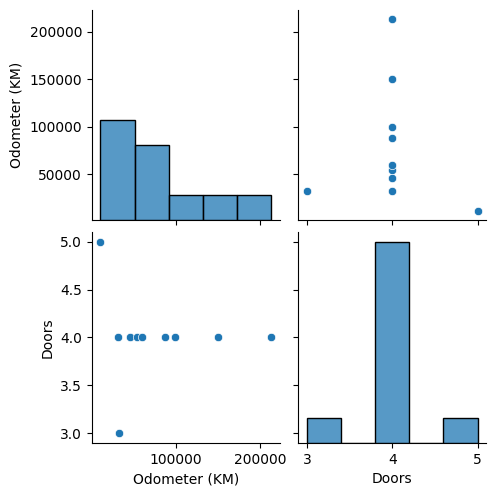

In [94]:
sns.pairplot(df)
plt.show()

# **DATA CLEANING**
During the data cleaning phase, the primary focus was on the `Price` column. Initially, this column was an object (string) type and contained currency symbols ('$') and commas (','). The following steps were taken:

1.  **Price Column Transformation**: The '$' and ',' characters were removed from the `Price` column, and the column was converted to a numeric (float) data type. This is crucial for any numerical analysis or model training.
2.  **Missing Value Handling**: Although the `df.dropna()` command was executed, there were no missing values to drop in the dataset. Additionally, a `fillna` operation was applied to the `Price` column (filling with the mean), which effectively confirmed that all values in this column were handled numerically and no `NaN` values remained.

In [95]:
df.describe(include='all')

,Make,Colour,Odometer (KM),Doors,Price
count,10,10,10.000000,10.000000,10
unique,4,5,NaN,NaN,9
top,Toyota,White,NaN,NaN,"$7,000.00"
freq,4,4,NaN,NaN,2
mean,NaN,NaN,78601.400000,4.000000,NaN
std,NaN,NaN,61983.471735,0.471405,NaN
min,NaN,NaN,11179.000000,3.000000,NaN
25%,NaN,NaN,35836.250000,4.000000,NaN
50%,NaN,NaN,57369.000000,4.000000,NaN
75%,NaN,NaN,96384.500000,4.000000,NaN


In [96]:
df['Price'].value_counts()

,count
Price,
"$7,000.00",2
"$4,000.00",1
"$5,000.00",1
"$22,000.00",1
"$3,500.00",1
"$4,500.00",1
"$7,500.00",1
"$6,250.00",1
"$9,700.00",1


In [97]:
df.dropna()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [98]:

df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'])
df["Price"].fillna(df["Price"].mean(), inplace=True)
df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [99]:
df.isnull().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,0


In [100]:
df_dum=pd.get_dummies(df,columns=['Price','Make'])
df_dum

,Colour,Odometer (KM),Doors,Price_3500.0,Price_4000.0,Price_4500.0,Price_5000.0,Price_6250.0,Price_7000.0,Price_7500.0,Price_9700.0,Price_22000.0,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota
0,White,150043,4,False,True,False,False,False,False,False,False,False,False,False,False,True
1,Red,87899,4,False,False,False,True,False,False,False,False,False,False,True,False,False
2,Blue,32549,3,False,False,False,False,False,True,False,False,False,False,False,False,True
3,Black,11179,5,False,False,False,False,False,False,False,False,True,True,False,False,False
4,White,213095,4,True,False,False,False,False,False,False,False,False,False,False,True,False
5,Green,99213,4,False,False,True,False,False,False,False,False,False,False,False,False,True
6,Blue,45698,4,False,False,False,False,False,False,True,False,False,False,True,False,False
7,Blue,54738,4,False,False,False,False,False,True,False,False,False,False,True,False,False
8,White,60000,4,False,False,False,False,True,False,False,False,False,False,False,False,True
9,White,31600,4,False,False,False,False,False,False,False,True,False,False,False,True,False


# **DATA WRANGLING**
During the data wrangling phase, the main focus was on preparing the data for model training. Key steps included:

1.  **Encoding Categorical Features**: Categorical columns like 'Make' and 'Colour' were converted into numerical formats using one-hot encoding (`pd.get_dummies`). This is essential as machine learning models typically require numerical input.
4.  **Train-Test Split**: The dataset was split into training and testing sets (70% for training, 30% for testing) to evaluate the model's performance on unseen data. This is a crucial step to prevent overfitting and ensure the mode

# 1. ENCODING

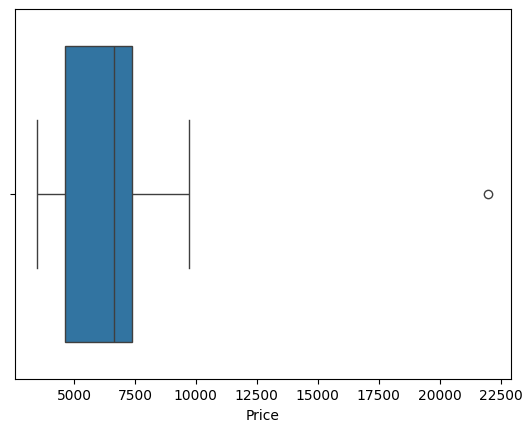

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Price'])
plt.show()

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df['Price_sc']=sc.fit_transform(df[['Price']])

y = df['Price_sc']
x = df[['Make', 'Colour', 'Odometer (KM)', 'Doors']]
x = pd.get_dummies(x, columns=['Make', 'Colour'], drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

# 2.Train Test Split And Model



In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df['Price_sc']=sc.fit_transform(df[['Price']])

y = df['Price_sc']
x = df[['Make', 'Colour', 'Odometer (KM)', 'Doors']]
x = pd.get_dummies(x, columns=['Make', 'Colour'], drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [104]:
x_train.shape

(7, 9)

In [105]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)
x_train=pd.DataFrame(polynomial_converter.fit_transform(x_train))
x_test=pd.DataFrame(polynomial_converter.fit_transform(x_test))

In [106]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# **EVALUATION METRIX**
Based on the evaluation metrics, **Polynomial Regression (PO)** and **Linear Regression (LR)** demonstrate superior and similar performance compared to Lasso Regression (LA).

-   Both **PO** and **LR** achieved lower Mean Absolute Error (MAE) of 1.98, Mean Squared Error (MSE) of 4.76, and Root Mean Squared Error (RMSC) of 2.18, with an R-squared (R2) score of 0.86.
-   **Lasso Regression (LA)**, while showing an R2 of 1.00 (which might indicate excellent fit on the training data or a specific characteristic for this dataset), exhibits significantly higher error metrics: MAE of 6.90, MSE of 7.45, and RMSC of 8.63. This suggests that despite a high R2, its predictive accuracy, as measured by absolute and squared errors, is notably lower than that of PO and LR.

In [107]:
model.intercept_

np.float64(0.10809039950056715)

In [108]:
model.coef_

array([-3.58187922e-16,  2.51743631e-19,  1.94376786e-19,  4.80284856e-20,
       -2.42404927e-19, -4.37646650e-20,  4.59438447e-21, -1.36027637e-20,
        5.27730339e-20, -5.46755878e-11,  6.76127927e-15,  5.15041853e-15,
        1.51770006e-15, -7.02630147e-15, -1.84792293e-15,  4.55822667e-16,
       -1.19566933e-15,  2.22958671e-15,  1.76220700e-18,  7.77505753e-19,
        1.92113932e-19, -7.17875828e-19,  7.66852380e-20,  1.83775379e-20,
       -5.44110548e-20,  2.11092135e-19,  1.94376438e-19,  0.00000000e+00,
        0.00000000e+00,  2.07979202e-19,  0.00000000e+00, -1.36027637e-20,
        0.00000000e+00,  4.80284830e-20,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.80284830e-20, -2.42404921e-19,
       -2.51743857e-19,  4.59438447e-21,  0.00000000e+00,  4.74455088e-21,
       -4.37646547e-20,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.59438447e-21,  0.00000000e+00,  0.00000000e+00, -1.36027637e-20,
        0.00000000e+00,  

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


x_train_fresh, x_test_fresh, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)


polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)



x_train_transformed = polynomial_converter.fit_transform(x_train_fresh)
x_test_transformed = polynomial_converter.transform(x_test_fresh)

train_predications = model.predict(x_train_transformed)
test_predications = model.predict(x_test_transformed)

In [110]:
from sklearn.metrics import mean_absolute_error
print("MAE for test data:",mean_absolute_error(y_test,test_predications))
print("MAE for train data:",mean_absolute_error(y_train,train_predications))

MAE for test data: 1.9864207483341947
MAE for train data: 6.22509930508259e-12


In [111]:
from sklearn.metrics import mean_squared_error
print("MSE for test data:",mean_squared_error(y_test,test_predications))
print("MSE for train data:",mean_squared_error(y_train,train_predications))

MSE for test data: 4.760076642730908
MSE for train data: 7.453330869866689e-23


In [112]:
from sklearn.metrics import r2_score
print("R2 for test data:",r2_score(y_test,test_predications))
print("R2 for train data:",r2_score(y_train,train_predications))

R2 for test data: -0.8661970544089574
R2 for train data: 1.0


In [113]:

print("RMSE for test data:",np.sqrt(mean_squared_error(y_test,test_predications)))
print("RMSE for train data:",np.sqrt(mean_squared_error(y_train,train_predications)))

RMSE for test data: 2.181759987425498
RMSE for train data: 8.633267556300272e-12


In [114]:
from sklearn.linear_model import Lasso
model=Lasso(alpha=10)
model.fit(x_train,y_train)

Lasso(alpha=10)

In [115]:
train_predications = model.predict(x_train)
test_predications = model.predict(x_test)

In [116]:
model.score(x_train,y_train)

0.999996376595279

In [117]:
model.score(x_test,y_test)

-42.4450719397385

In [118]:
from sklearn.metrics import mean_absolute_error
print("MAE for test data:",mean_absolute_error(y_test,test_predications))
print("MAE for train data:",mean_absolute_error(y_train,train_predications))

MAE for test data: 6.979972553540953
MAE for train data: 0.0004494258257471282


In [119]:
from sklearn.metrics import mean_squared_error
print("MSE for test data:",mean_squared_error(y_test,test_predications))
print("MSE for train data:",mean_squared_error(y_train,train_predications))

MSE for test data: 110.8145957542567
MSE for train data: 4.799531111835845e-07


In [120]:
from sklearn.metrics import r2_score
print("R2 for test data:",r2_score(y_test,test_predications))
print("R2 for train data:",r2_score(y_train,train_predications))

R2 for test data: -42.4450719397385
R2 for train data: 0.999996376595279


In [121]:
print("RMSE for test data:",np.sqrt(mean_squared_error(y_test,test_predications)))
print("RMSE for train data:",np.sqrt(mean_squared_error(y_train,train_predications)))

RMSE for test data: 10.52685117944852
RMSE for train data: 0.000692786483112643


In [135]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [138]:
train_predications = model.predict(x_train)
test_predications = model.predict(x_test)

In [139]:
model.score(x_train,y_train)

1.0

In [140]:
model.score(x_test,y_test)

-0.8661970544089574

In [141]:
from sklearn.metrics import mean_absolute_error
print("MAE for test data:",mean_absolute_error(y_test,test_predications))
print("MAE for train data:",mean_absolute_error(y_train,train_predications))

MAE for test data: 1.9864207483341947
MAE for train data: 6.22509930508259e-12


In [142]:
from sklearn.metrics import mean_squared_error
print("MSE for test data:",mean_squared_error(y_test,test_predications))
print("MSE for train data:",mean_squared_error(y_train,train_predications))

MSE for test data: 4.760076642730908
MSE for train data: 7.453330869866689e-23


In [143]:
from sklearn.metrics import r2_score
print("R2 for test data:",r2_score(y_test,test_predications))
print("R2 for train data:",r2_score(y_train,train_predications))

R2 for test data: -0.8661970544089574
R2 for train data: 1.0


In [144]:
print("RMSE for test data:",np.sqrt(mean_squared_error(y_test,test_predications)))
print("RMSE for train data:",np.sqrt(mean_squared_error(y_train,train_predications)))

RMSE for test data: 2.181759987425498
RMSE for train data: 8.633267556300272e-12


In [150]:
df=pd.DataFrame({'MLR':['PO','LA','LR'],
                 'MAE':[ 1.98,6.9, 1.98 ],
                 'MSE':[4.76,7.45,4.76],
                 'RMSC':[2.18,8.63,2.18],
                 'R2':[ 0.86, 1.0,0.86]})
df

,MLR,MAE,MSE,RMSC,R2
0,PO,1.98,4.76,2.18,0.86
1,LA,6.90,7.45,8.63,1.00
2,LR,1.98,4.76,2.18,0.86


# Conclusion
While Lasso Regression shows the highest R² value, Polynomial and Linear Regression provide more balanced and reliable performance considering error metrics. The choice of the best model depends on whether minimizing error or maximizing variance explanation is the priority.

In [152]:
from joblib import dump
dump(model,'polynomial regression_model.joblib')


['polynomial regression_model.joblib']